In [1]:
%load_ext autoreload

In [2]:
import os
import sys
import pickle
import glob

os.environ['CUDA_VISIBLE_DEVICES'] = '4'

sys.path.insert(0, '../src-py/')
sys.path.insert(0, '../../src-py/')

In [3]:
%autoreload
import json
from moral_debater import *
import pandas as pd
import bert_moral_classification

pd.set_option('display.max_colwidth', None)

Given a topic:
- Collect some thousands of sentences on it.
- classify sentences based on morals.
- Keep the ones that reflect the correct moral.
- Create a narrative from them

In [18]:
data_path = '../../../moral-debater-data/moal-narratives/'

In [4]:
morals = ['care', 'authority', 'fairness', 'loyalty', 'purity']

In [5]:
debater_api = DebaterApi('0abeffa5335cc942fc7c43e75d41fe33L05')
query_size=3000

In [15]:
top_20_big_issues = [
 'Gay Marriage',
 'Abortion',
 'Death Penalty',
 'Minimum Wage',
 'Affirmative Action',
 'Barack Obama',
 'Capitalism',
 'Global Warming',
 'Euthanasia',
 'Animal Rights',
 'Electoral College',
 'National Health Care',
 'Free Trade',
 'Federal Reserve',
 'Welfare',
 'Border Fence',
 'Medical Marijuana',
 'Flat Tax',
 'Legalized Prostitution',
 'Socialism'
]

In [16]:
moral_dict = {
    'binding': set(['loyalty', 'authority', 'purity']),
    'individual': set(['fairness', 'care'])
}

In [20]:
topic_narratives = collect_narratives_via_classifier(top_20_big_issues[0:2], moral_dict, 10000, old_narratives={},  use_cache=False)


TermWikifierClient: 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

[['Same-sex marriage'], ['Abortion']]


TermWikifierClient: 100%|██████████| 2/2 [03:04<00:00, 92.30s/it]


No CUDA GPUs are available


In [121]:
def check_narratives(narratives):
    for topic in narratives:
        for stance in ['pro', 'con']:
            for m in ['binding', 'individual', 'general']:
                print(topic, m, stance)
                if '{}_{}_narrative'.format(m,stance) in narratives[topic]:
                    analyse_speech(narratives[topic]['{}_{}_narrative'.format(m,stance)])
                else:
                    print('{}_{}_narrative of {} is missing'.format(m,stance, topic) )

In [70]:
pickle.dump(topic_narratives, open(data_path + 'moral_narratives_via_classifier_for_top_20_big_issues.pkl', 'wb'))

In [122]:
check_narratives(topic_narratives)

Gay Marriage binding pro
Number of Paragraphs: 7
Number of arguments: 191
Number of filtered-out arguments: 695
Number of key points: 0
Number of clusters: 6
Clusters: ['Majority', 'Legalization', 'LGBT', 'Man', 'Amendment', 'Ban (law)']
====
Gay Marriage individual pro
Number of Paragraphs: 7
Number of arguments: 123
Number of filtered-out arguments: 297
Number of key points: 0
Number of clusters: 5
Clusters: ['Child', 'LGBT rights by country or territory', 'LGBT', 'Ban (law)', 'LGBT community']
====
Gay Marriage general pro
Number of Paragraphs: 7
Number of arguments: 327
Number of filtered-out arguments: 1028
Number of key points: 0
Number of clusters: 9
Clusters: ['Voting', 'Constitutionality', 'LGBT rights by country or territory', 'Barack Obama', 'Ban (law)', 'LGBT', 'Majority', 'Legalization', 'Gay']
====
Gay Marriage binding con
Number of Paragraphs: 7
Number of arguments: 133
Number of filtered-out arguments: 753
Number of key points: 0
Number of clusters: 5
Clusters: ['Ban (l

In [126]:
topic_and_narratives_df1 = pd.DataFrame([[topic,
                                    narrative_name.split('_')[1],
                                    narrative_name.split('_')[0],
                                    str(narrative)] for topic, topic_info in topic_narratives.items() for narrative_name, narrative in topic_info.items() if 'narrative' in narrative_name],
                                    columns=['topic', 'stance', 'moral_class', 'narrative'])

In [127]:
topic_and_narratives_df1.head()

,topic,stance,moral_class,narrative
0,Gay Marriage,pro,binding,"Greetings all. The crowd has contributed 886 arguments in support of the claim that Gay Marriage. Following is a summary of its thoughts. \n\nThere are four issues the crowd has raised, supporting the perception that Gay Marriage: majority, legalization, lgbt and men. \n\nRegarding majority. The majority of Catholics support gay marriage. In the United States and Spain, it support gay marriage, followed by France at 43% support. Public opinion polls currently indicate majority support for gay marriage among the people of the Commonwealth. Polls have shown that a majority of the Swiss population supports same-sex marriage, with the most recent one finding 75% support. In 2012 a poll by MaltaToday showed that 41% of Maltese supported same-sex marriage, with support increasing to 60% amongst the 18-35 age group. \n\nNext, a few words about legalization. Martin O'Malley, the Governor of the US state of Maryland, signs a law legalizing gay marriage in that state. Keep - legalizing gay marriage in the region has become an important focal point of the same-sex marriage movement. Singer, whose son Andrew married his husband Corey Morris in a same-sex marriage in Massachusetts in 2009, has also financially supported the legalization of gay marriage in New York, and Maryland. In Quinn's 2013 State of the State address, he declared his commitment to the legalization of gay marriage. \n\nThe next issue is lgbt. Spearman, who is lesbian herself, supported gay marriage and abortion. The establishment of same-sex marriage is associated with a significant reduction in the rate of attempted suicide among children, with the effect being concentrated among children of a minority sexual orientation. 60% of Catholics favor allowing gay and lesbian couples to marry legally, compared to 55% of Americans as a whole. \n\nThe last issue is men. A study of the conditions for gay men indicates that gay men in the Danish Defence show strength and are respected. Gay activist Jonathan Rauch has argued that marriage is good for all men, whether homosexual or heterosexual, because engaging in its social roles reduces men's aggression and promiscuity. Gay men make better fighters, because, having no family, they are closer to their comrades. \n\nFor all these reasons, the crowd is supporting the notion that Gay Marriage. Thanks for tuning in."
1,Gay Marriage,con,binding,"Hello everybody. The crowd posted 886 arguments, opposing the claim that Gay Marriage. Here is a summary. \n\nThere are four issues the crowd has raised, opposing the perception that Gay Marriage: bans, bestiality, wrongs and proposition 8. \n\nRegarding bans. The 2012 Minnesota constitutional amendment to ban gay marriage. In 2005, she led a march to her father's gravesite and at the same time called out for a constitutional ban on gay marriage. Hunter opposed same-sex marriage, and proposed a constitutional amendment to ban same-sex marriage. According to a poll, conducted in February 2005 by Research 2000 for the Concord Monitor, 51% of likely voters in the state supported a federal constitutional amendment to ban same-sex marriage. \n\nNext, a few words about bestiality. Gay marriage will lead to legalized bestiality. It is a threat to all marriage. Allowing gay marriage would lead to legal bestiality. Conservatives use the argument that legalizing gay marriage will ultimately lead to legalized bestiality. Gay behavior should be a criminal offense. \n\nThe next issue is wrongs. Gay marriage is wrong. Marriage is the wrong goal, as it is an institution rooted in sexism. Homosexual marriage is wrong, then that would seem to be pretty strong evidence that it is wrong. Sex outside of marriage is sinful, and therefore gay sex is sinful. \n\nThe last issue is proposition 8. Proposition 8, which banned gay marriage within California. Korean-Americans, due to their Republican and Christian leanings, overwhelmingly supported California

In [129]:
topic_and_narratives_df1.to_csv(data_path + 'top_20_big_issues_narratives.csv')

### Analyse morals of generated narratives:

In [59]:
data = pickle.load(open(data_path + 'moral_narratives_via_classifier_for_top_20_big_issues.pkl', 'rb'))

In [74]:
speech = data['Gay Marriage']['individual_pro_narrative']
[x.text for x in speech.arguments.values()]

['"Gay proved to be an enormous help," wrote Minnelli later.',
 "14 - In Bishop v. Oklahoma, U.S. District Court Judge Terence Kern ruled that the Oklahoma's ban on gay marriage violates the equal protection clause of the U.S. constitution for homosexual couples.",
 "20 - In Kitchen v. Herbert, U.S. District Judge Robert Shelby ruled that the Utah's ban on gay marriage violates the due process and equal protection under the 14th Amendment for gay and lesbian couples [REF].",
 "25 \nIn Baskin v. Bogan, U.S. District Court Judge Richard Young ruled that Indiana's statutory ban on gay marriage violates the equal protection clause of the U.S. Constitution [REF].",
 "6 - In Wolf v. Walker, U.S. District Court Judge Barbara Crabb ruled that Wisconsin's constitutional and legislative ban on gay marriage violates the due process clause of the U.S. constitution, and discriminates on the basis of sexual orientation, violating the equal protection clause [REF].",
 "9 - In a combined case of Brink

In [73]:
speech = data['Gay Marriage']['binding_pro_narrative']
[x.text for x in speech.arguments.values()]

['"After all, Islam despises homosexuality-and this Muslim-friendly gay bar would help mend fences", Gutfeld said [REF].',
 "(BBC) (BBC) (Daily Mail)\nAlbania's Prime Minister Sali Berisha indicates he may legalise gay marriage in the country.",
 "(CNN)\nMartin O'Malley, the Governor of the US state of Maryland, signs a law legalizing gay marriage in that state.",
 '(John Edwards supported civil unions, while Elizabeth Edwards had stated that she supported gay marriage.)',
 "(Reuters) (Washington Post)\nSame-sex marriage in the United States: The New York State Supreme Court rules that the state's ban on same-sex marriage violates the state constitution.",
 "(The Guardian)\nA Virginia judge rules the state's prohibition of gay marriage unconstitutional.",
 ', Islam despises homosexuality-and this Muslim-friendly gay bar would help mend fences',
 "20 - The Supreme Court of California agrees to hear arguments for a possible overturn of Proposition 8. \n24 - A lower court in the U.S. stat

In [41]:
import matplotlib.pyplot as plt

In [13]:
topic_and_narratives_df = pd.read_csv('../../data/top_20_big_issues_narratives.csv')

In [18]:
topic_and_narratives_df=topic_and_narratives_df.dropna()

In [19]:
len(topic_and_narratives_df)

110

In [20]:
topic_and_narratives_df.head()

,Unnamed: 0,topic,stance,moral_class,narrative
0,0,Gay Marriage,pro,binding,"Greetings all. The crowd has contributed 886 arguments in support of the claim that Gay Marriage. Following is a summary of its thoughts. \n\nThere are four issues the crowd has raised, supporting the perception that Gay Marriage: majority, legalization, lgbt and men. \n\nRegarding majority. The majority of Catholics support gay marriage. In the United States and Spain, it support gay marriage, followed by France at 43% support. Public opinion polls currently indicate majority support for gay marriage among the people of the Commonwealth. Polls have shown that a majority of the Swiss population supports same-sex marriage, with the most recent one finding 75% support. In 2012 a poll by MaltaToday showed that 41% of Maltese supported same-sex marriage, with support increasing to 60% amongst the 18-35 age group. \n\nNext, a few words about legalization. Martin O'Malley, the Governor of the US state of Maryland, signs a law legalizing gay marriage in that state. Keep - legalizing gay marriage in the region has become an important focal point of the same-sex marriage movement. Singer, whose son Andrew married his husband Corey Morris in a same-sex marriage in Massachusetts in 2009, has also financially supported the legalization of gay marriage in New York, and Maryland. In Quinn's 2013 State of the State address, he declared his commitment to the legalization of gay marriage. \n\nThe next issue is lgbt. Spearman, who is lesbian herself, supported gay marriage and abortion. The establishment of same-sex marriage is associated with a significant reduction in the rate of attempted suicide among children, with the effect being concentrated among children of a minority sexual orientation. 60% of Catholics favor allowing gay and lesbian couples to marry legally, compared to 55% of Americans as a whole. \n\nThe last issue is men. A study of the conditions for gay men indicates that gay men in the Danish Defence show strength and are respected. Gay activist Jonathan Rauch has argued that marriage is good for all men, whether homosexual or heterosexual, because engaging in its social roles reduces men's aggression and promiscuity. Gay men make better fighters, because, having no family, they are closer to their comrades. \n\nFor all these reasons, the crowd is supporting the notion that Gay Marriage. Thanks for tuning in."
1,1,Gay Marriage,con,binding,"Hello everybody. The crowd posted 886 arguments, opposing the claim that Gay Marriage. Here is a summary. \n\nThere are four issues the crowd has raised, opposing the perception that Gay Marriage: bans, bestiality, wrongs and proposition 8. \n\nRegarding bans. The 2012 Minnesota constitutional amendment to ban gay marriage. In 2005, she led a march to her father's gravesite and at the same time called out for a constitutional ban on gay marriage. Hunter opposed same-sex marriage, and proposed a constitutional amendment to ban same-sex marriage. According to a poll, conducted in February 2005 by Research 2000 for the Concord Monitor, 51% of likely voters in the state supported a federal constitutional amendment to ban same-sex marriage. \n\nNext, a few words about bestiality. Gay marriage will lead to legalized bestiality. It is a threat to all marriage. Allowing gay marriage would lead to legal bestiality. Conservatives use the argument that legalizing gay marriage will ultimately lead to legalized bestiality. Gay behavior should be a criminal offense. \n\nThe next issue is wrongs. Gay marriage is wrong. Marriage is the wrong goal, as it is an institution rooted in sexism. Homosexual marriage is wrong, then that would seem to be pretty strong evidence that it is wrong. Sex outside of marriage is sinful, and therefore gay sex is sinful. \n\nThe last issue is proposition 8. Proposition 8, which banned gay marriage within California. Korean-Americans, due to their Republican and Christian leanings, overwhelmingly suppo

In [22]:
topic_and_narratives_df['narrative_paras'] = topic_and_narratives_df.narrative.apply(lambda x: x.split('\n\n')[2:-1])
topic_and_narratives_df['narrative_paras'] = topic_and_narratives_df.narrative_paras.apply(lambda paras:
                                                list(zip(paras, bert_moral_classification.get_arg_morals(paras))))

In [35]:
topic_and_narratives_df['narrative_morals'] = topic_and_narratives_df.narrative_paras.apply(lambda paras: [x[1] for x in paras])

In [36]:
topic_and_narratives_df[['topic', 'stance', 'moral_class', 'narrative_morals']].head(n=100)

,topic,stance,moral_class,narrative_morals
0,Gay Marriage,pro,binding,"[{care, authority}, {authority}, {care, authority}, {authority}]"
1,Gay Marriage,con,binding,"[{fairness, authority}, {authority}, {purity, authority}, {authority}]"
2,Gay Marriage,pro,individual,"[{authority, care, loyalty}, {fairness, authority}, {fairness, authority}, {fairness, authority}]"
3,Gay Marriage,con,individual,"[{authority, loyalty}, {fairness, purity, authority}, {purity, authority, care}, {authority, loyalty}]"
4,Gay Marriage,pro,general,"[{care, authority}, {authority}, {fairness, authority}, {authority}]"
...,...,...,...,...
97,Legalized Prostitution,con,individual,"[{authority}, {fairness, authority}, {purity, authority}, {care, authority}]"
98,Legalized Prostitution,pro,general,"[{authority}, {care, authority}, {authority}, {authority}]"
99,Legalized Prostitution,con,general,"[{fairness, authority}, {purity, authority}, {fairness, authority}, {authority}]"
100,Socialism,pro,binding,"[{authority}, {authority}, {authority, loyalty}, {purity, authority}]"


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


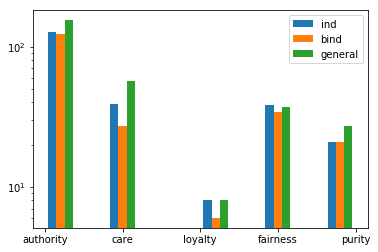

In [75]:
binding_args = [moral for narrative in topic_and_narratives_df[topic_and_narratives_df.moral_class=='binding'].narrative_morals.tolist() for para in narrative for moral in para]
ind_args = [moral for narrative in topic_and_narratives_df[topic_and_narratives_df.moral_class=='individual'].narrative_morals.tolist() for para in narrative for moral in para]
general_args = [moral for narrative in topic_and_narratives_df[topic_and_narratives_df.moral_class=='general'].narrative_morals.tolist() for para in narrative for moral in para]

plt.hist([ind_args, binding_args, general_args], label=['ind', 'bind', 'general'])
plt.legend()
plt.yscale('log')
plt.show()

In [80]:
%autoreload
import utils
import json
from moral_debater import *
import pandas as pd
import bert_moral_classification

pd.set_option('display.max_colwidth', None)

In [81]:
topic_narratives = collect_narratives_via_classifier(['Gay Marriage'], moral_dict, 100, [], use_cache=False)


TermWikifierClient: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


[['Same-sex marriage']]



EvidenceDetectionClient:   0%|          | 0/237 [00:00<?, ?it/s]

Topic:Gay Marriage, Moral:binding
['The state recorded the highest Yes votes of any state in the republic referendum and same-sex marriage survey.', 'Group marriage is a form of non-monogamy and polyamory.', 'Their marriage appears to have been a happy one.', 'That led to marriage and the birth of his daughter, Emily.', 'The strain on his marriage led to his divorce.', 'Milano Pride is one of the largest gay and lesbian organized events in Italy.', 'Homok is associated with marriage because the Thai people believe that the marriage of ingredients within the homok is representative of the love of a married couple.', 'During the marriage campaign, support for gay marriage increased by 14 points, volunteers collected 160,000 signatures to put gay marriage on the ballot, and the marriage campaign raised $3 million [REF].', 'His second marriage resulted in no offspring.', "The Court concluded that the marriage violated Oregon's miscegenation law.", 'I accept that the subject clearly does no


EvidenceDetectionClient: 100%|██████████| 237/237 [00:00<00:00, 556.09it/s]

ClaimDetectionClient:   0%|          | 0/237 [00:00<?, ?it/s]

Number of evidences: 16



ClaimDetectionClient: 100%|██████████| 237/237 [00:00<00:00, 561.88it/s]

ClaimBoundariesClient:   0%|          | 0/29 [00:00<?, ?it/s]

Number of claims: 29



ClaimBoundariesClient: 100%|██████████| 29/29 [00:00<00:00, 90.27it/s]

ProConClient: 100%|██████████| 41/41 [00:01<00:00, 36.28it/s]


Same-sex marriage
Gay Marriage
22/07/2021 14:08:56, SpeechResultResponse=60f97bf789eaee050fc808f1, motionGenerationid=0, status=RUNNING, started to wait at 22/07/2021 14:08:56



ProConClient:   0%|          | 0/41 [00:00<?, ?it/s]

Narrative is empty...



ProConClient: 100%|██████████| 41/41 [00:00<00:00, 124.48it/s]


Same-sex marriage
Gay Marriage
22/07/2021 14:09:08, SpeechResultResponse=60f97c0389eaee050fc808f4, motionGenerationid=0, status=RUNNING, started to wait at 22/07/2021 14:09:07



EvidenceDetectionClient:   0%|          | 0/140 [00:00<?, ?it/s]

Topic:Gay Marriage, Moral:individual
["Just like Ex-gay movement or Ex-gay is related to Gay and Gay rights movement, but that doesn't mean that we should merge Ex-gay movement to Gay rights movement or sometning.--В", 'Conservative pro-gay-marriage columnist S.E.', 'The marriage leads to tension between Marge and Selma.', 'People who oppose what gay rights supporters would call gay rights oppose them as rights at all, so they are definitionally opposed to gay rights.', 'On gay rights issues, the party supports possibilities for gay couples to live together, but opposes gay marriage and gay adoption rights.', 'Meyers supports gay rights [REF].', 'Anti gay-marriage, pro gay rights otherwise.', 'The State shall also protect and encourage marriage.', 'While I am against gay discrimination, I am also against gay parenthood and gay marriage (I would vote this way).', 'Marriage Equality or Gay Marriage;\nHabeas Corpus;\nAffirmative Action; and \nTitle IX.', 'My intent was to send a message a


EvidenceDetectionClient: 100%|██████████| 140/140 [00:18<00:00,  7.67it/s]

ClaimDetectionClient:   0%|          | 0/140 [00:00<?, ?it/s]

Number of evidences: 6



ClaimDetectionClient: 100%|██████████| 140/140 [00:18<00:00,  7.65it/s]

ClaimBoundariesClient:   0%|          | 0/9 [00:00<?, ?it/s]

Number of claims: 9



ClaimBoundariesClient: 100%|██████████| 9/9 [00:01<00:00,  8.89it/s]

ProConClient: 100%|██████████| 15/15 [00:00<00:00, 19.10it/s]


Same-sex marriage
Gay Marriage
22/07/2021 14:09:58, SpeechResultResponse=60f97c3589eaee050fc808f7, motionGenerationid=0, status=RUNNING, started to wait at 22/07/2021 14:09:57



ProConClient:   0%|          | 0/15 [00:00<?, ?it/s]

Narrative is empty...



ProConClient: 100%|██████████| 15/15 [00:00<00:00, 46.40it/s]


Same-sex marriage
Gay Marriage
22/07/2021 14:10:09, SpeechResultResponse=60f97c41ed7ca41fdb889823, motionGenerationid=0, status=RUNNING, started to wait at 22/07/2021 14:10:09



EvidenceDetectionClient:   0%|          | 0/391 [00:00<?, ?it/s]

Narrative is empty...



EvidenceDetectionClient: 100%|██████████| 391/391 [00:28<00:00, 13.53it/s]

ClaimDetectionClient:   0%|          | 0/391 [00:00<?, ?it/s]

Number of evidences: 23



ClaimDetectionClient: 100%|██████████| 391/391 [00:20<00:00, 19.52it/s]

ClaimBoundariesClient:   0%|          | 0/40 [00:00<?, ?it/s]

Number of claims: 40



ClaimBoundariesClient: 100%|██████████| 40/40 [00:00<00:00, 124.29it/s]

ProConClient: 100%|██████████| 59/59 [00:00<00:00, 127.41it/s]


Same-sex marriage
Gay Marriage
22/07/2021 14:11:10, SpeechResultResponse=60f97c7eed7ca41fdb889826, motionGenerationid=0, status=RUNNING, started to wait at 22/07/2021 14:11:10



ProConClient:   0%|          | 0/59 [00:00<?, ?it/s]

Topic:Gay Marriage, Moral:general
General Narrative is empty...



ProConClient: 100%|██████████| 59/59 [00:00<00:00, 183.16it/s]


Same-sex marriage
Gay Marriage
22/07/2021 14:11:22, SpeechResultResponse=60f97c8a89eaee050fc808fa, motionGenerationid=0, status=RUNNING, started to wait at 22/07/2021 14:11:22
Topic:Gay Marriage, Moral:general
